# **11/11**

## **Tokenization**

In [ ]:
!set -x \ && pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

In [ ]:
from konlpy.tag import Mecab
tagger = Mecab()

In [ ]:
a = "파이썬 너무너무 어려워요. 재미는 있나요?"
tagger.pos(a)

[('파이썬', 'NNP'),
 ('너무너무', 'MAG'),
 ('어려워요', 'VA+EC'),
 ('.', 'SY'),
 ('재미', 'NNG'),
 ('는', 'JX'),
 ('있', 'VX'),
 ('나요', 'EF'),
 ('?', 'SF')]

In [ ]:
tagger.morphs(a)

['파이썬', '너무너무', '어려워요', '.', '재미', '는', '있', '나요', '?']

In [ ]:
tagger.nouns(a)

['파이썬', '재미']




*   케라스 토큰화







In [ ]:
from keras.preprocessing.text import text_to_word_sequence
text_to_word_sequence(a)

['파이썬', '너무너무', '어려워요', '재미는', '있나요']

## **키워드 분석**

In [ ]:
# from google.colab import files
# upload = files.upload()

In [ ]:
from collections import Counter

In [ ]:
PATH = '/content/drive/Shareddrives/Data/e-campus/빅데이터및커뮤니케이션/data/newyearsgreeting.txt'

In [ ]:
with open(PATH, 'r') as f:
    lines = f.read()
    nouns = tagger.nouns(lines)

    count = Counter(nouns)
    noun_list = count.most_common(30) # 자주 등장하는 단어 30순위 까지
    for i, noun in enumerate(noun_list):
        print(noun, end=" ")

        if  (i+1) % 4 == 0:
            print()

('우리', 43) ('것', 39) ('국민', 33) ('수', 33) 
('경제', 29) ('국가', 18) ('회복', 15) ('코로나', 14) 
('협력', 13) ('지난해', 12) ('세계', 11) ('위기', 11) 
('고용', 11) ('사회', 11) ('뉴딜', 11) ('안전', 10) 
('정부', 10) ('상생', 9) ('지원', 9) ('등', 9) 
('지역', 9) ('일상', 8) ('해', 8) ('년', 8) 
('시대', 8) ('노력', 8) ('여러분', 7) ('방역', 7) 
('올해', 7) ('추진', 7) 

In [ ]:
from konlpy.corpus import kolaw

In [ ]:
print(kolaw.open('constitution.txt').read())

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.
②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.
  제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.
  제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.
  제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.
②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.
  제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.
②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.
  제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.
②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다.
  제8조 ① 정당의 설립은 자유이며, 복수정당제

## **Bag of Words (BoW)**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

s = ["열심히 파이썬 공부를 했으니, 주말에는 공부를 멈추고 재미있게 보내요."]

vec = CountVectorizer()
bow = vec.fit_transform(s)

print(bow.toarray())
print(vec.vocabulary_)

[[2 1 1 1 1 1 1 1]]
{'열심히': 3, '파이썬': 6, '공부를': 0, '했으니': 7, '주말에는': 5, '멈추고': 1, '재미있게': 4, '보내요': 2}


# **11/16**

## **Import**

In [ ]:
from konlpy.tag import Mecab
from collections import Counter

tagger = Mecab()

## **Review 11/11**

In [ ]:
# from google.colab import files
# upload = files.upload()

In [ ]:
PATH_newYearGreet = '/content/drive/Shareddrives/Data/e-campus/빅데이터및커뮤니케이션/data/newyearsgreeting.txt'
PATH_mSpeech = '/content/drive/Shareddrives/Data/e-campus/빅데이터및커뮤니케이션/data/mspeech.txt'

In [ ]:
with open(PATH_mSpeech, 'r') as f:
    lines = f.read()
    nouns = tagger.nouns(lines) # 명사만 뽑아온다
    print("nouns : ",nouns[:8])

    count = Counter(nouns)  # 뽑아온 명사의 개수를 센다
    noun_list = count.most_common(30)   # 그 중 가장 빈도수가 높은 명사부터 30개 뽑아 list형태로 반환
    print("noun_list most common 8 : ",noun_list[:8])

    noun_dict = dict(noun_list) # list가 아닌 dictionary 형태
    print("noun_dict : ", noun_dict)


nouns :  ['국민', '말씀', '존경', '사랑', '국민', '여러분', '감사', '국민']
noun_list most common 8 :  [('대통령', 34), ('국민', 27), ('대한민국', 10), ('나라', 10), ('저', 9), ('여러분', 8), ('우리', 8), ('역사', 7)]
noun_dict :  {'대통령': 34, '국민': 27, '대한민국': 10, '나라': 10, '저': 9, '여러분': 8, '우리': 8, '역사': 7, '것': 7, '선거': 7, '일': 7, '정치': 6, '존경': 5, '세상': 5, '말씀': 4, '감사': 4, '이번': 4, '지지': 4, '약속': 4, '시작': 4, '대화': 4, '권력': 4, '해결': 4, '사랑': 3, '머리': 3, '앞': 3, '문재인': 3, '광화문': 3, '소통': 3, '수': 3}


## **불용어 제거**

In [ ]:
stop_word = ['것', '수', '해', '등'] # 불용어 목록

with open(PATH_mSpeech, 'r') as f:
    lines = f.read()

    nouns = tagger.nouns(lines)
    nouns_stop = [i for i in nouns if i not in stop_word]
    count = Counter(nouns)
    count_stop = Counter(nouns_stop)
    top_nouns = dict(count.most_common(30))
    top_nouns_stop = dict(count_stop.most_common(30))

    print(top_nouns)
    print(top_nouns_stop)


{'대통령': 34, '국민': 27, '대한민국': 10, '나라': 10, '저': 9, '여러분': 8, '우리': 8, '역사': 7, '것': 7, '선거': 7, '일': 7, '정치': 6, '존경': 5, '세상': 5, '말씀': 4, '감사': 4, '이번': 4, '지지': 4, '약속': 4, '시작': 4, '대화': 4, '권력': 4, '해결': 4, '사랑': 3, '머리': 3, '앞': 3, '문재인': 3, '광화문': 3, '소통': 3, '수': 3}
{'대통령': 34, '국민': 27, '대한민국': 10, '나라': 10, '저': 9, '여러분': 8, '우리': 8, '역사': 7, '선거': 7, '일': 7, '정치': 6, '존경': 5, '세상': 5, '말씀': 4, '감사': 4, '이번': 4, '지지': 4, '약속': 4, '시작': 4, '대화': 4, '권력': 4, '해결': 4, '사랑': 3, '머리': 3, '앞': 3, '문재인': 3, '광화문': 3, '소통': 3, '한반도': 3, '평화': 3}


## **Visualization**

In [ ]:
### 아래 셀 실행후 런타임 다시시작 해줌.

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.style.use('seaborn-white')

%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size =10)
plt.rc('font', family='NanumBarunGothic')   # 나눔바른고딕 폰트 설치
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 63 not upgraded.


In [ ]:
import numpy as np

Matplotlib example

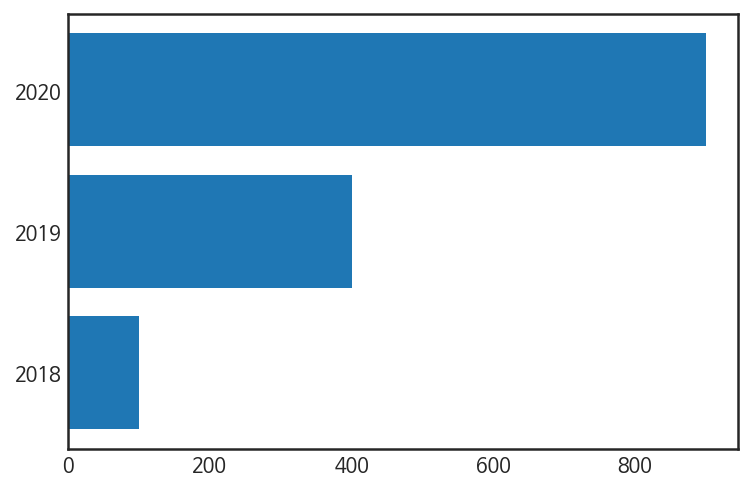

In [ ]:
y = np.arange(3)    # array([0, 1, 2])
years = ['2018', '2019', '2020']
values = [100, 400, 900]

plt.barh(y, values)     # 수평 막대 그래프
plt.yticks(y, years)    # y축에 표시할 눈금값

plt.show()  # 출력

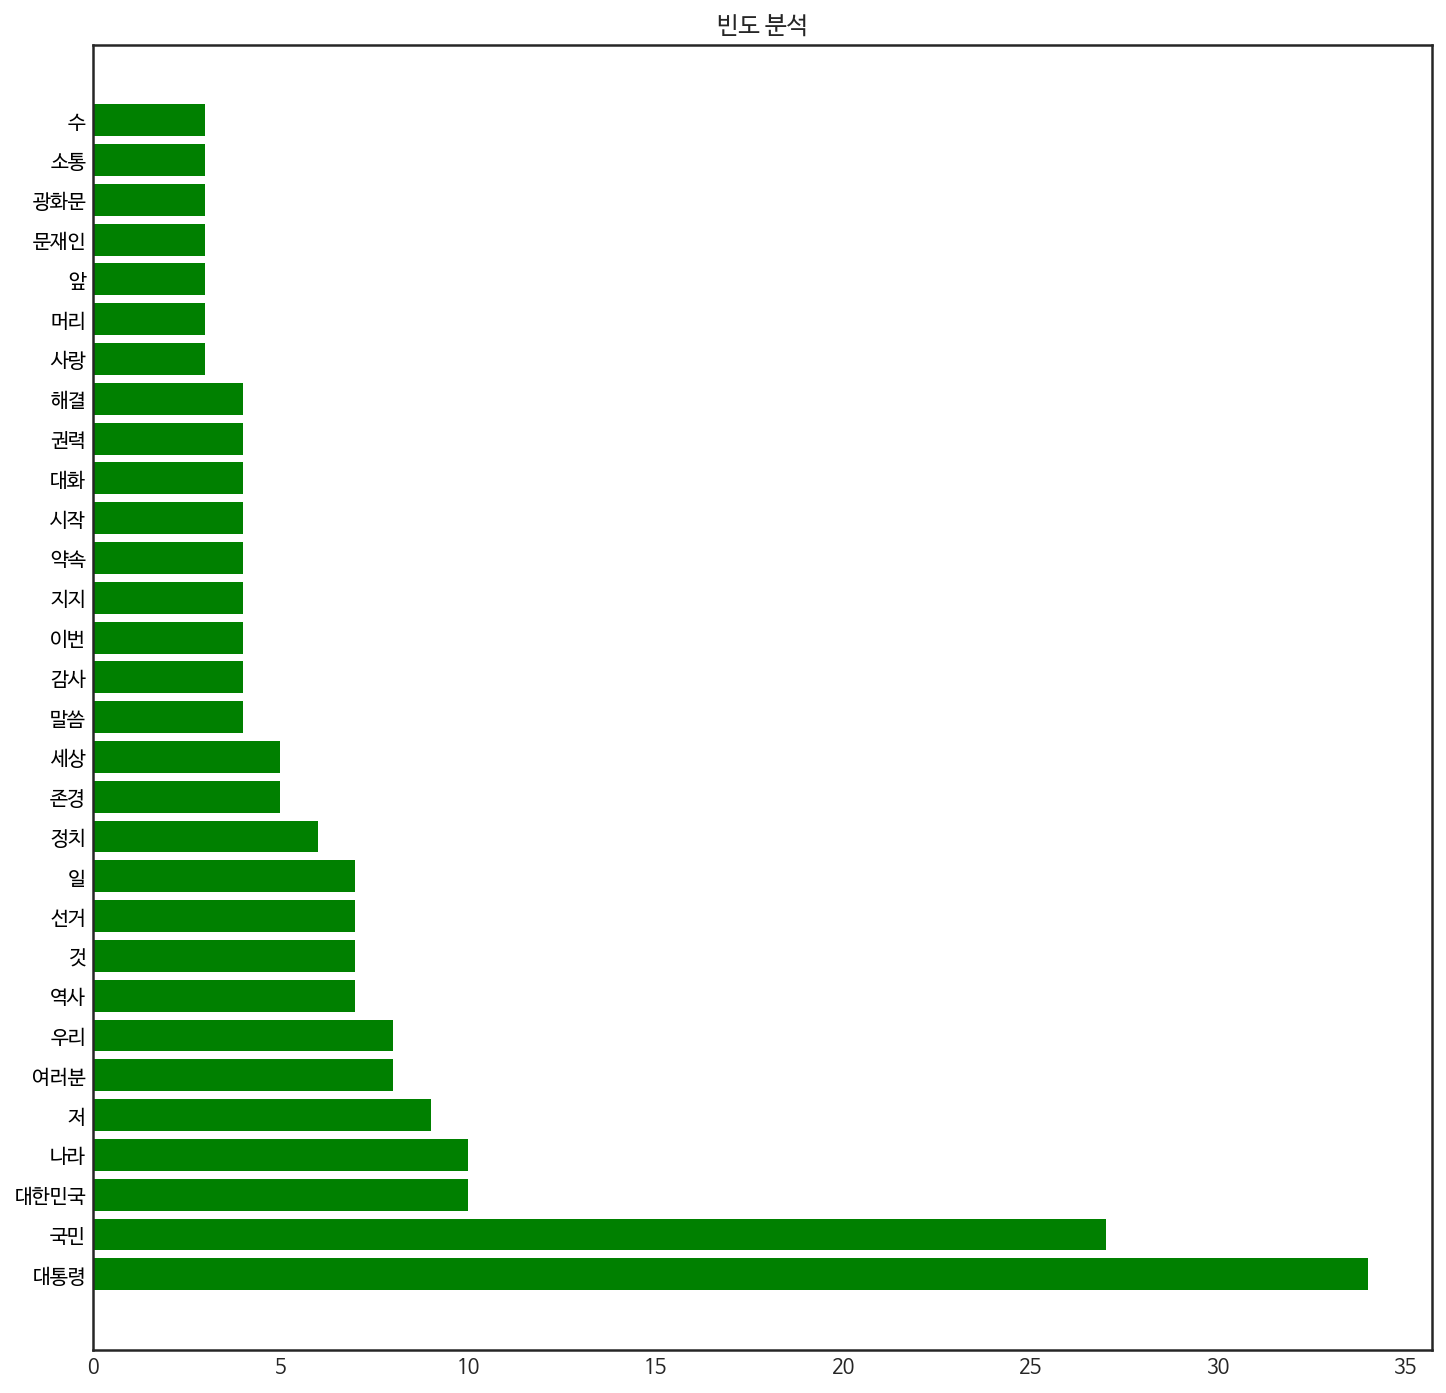

In [ ]:
y_pos = np.arange(len(top_nouns))   # 지정한 범위 [0,n)에 대해서 배열을 생성

plt.figure(figsize=(12,12)) # 가로, 세로 길이(inch)
plt.barh(y_pos, top_nouns.values(), color = 'g')    # 수평 막대 그래프
plt.yticks(y_pos, top_nouns.keys(), color = 'black')    # y축에 표시할 눈금값
plt.title('빈도 분석')
plt.show()